In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [4]:
Train = pd.read_csv('Train.csv')
Test = pd.read_csv('Test.csv')

In [4]:
Train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
new_df=Train.groupby('Outlet_Location_Type')['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales'].sum().sort_values('Item_Outlet_Sales',ascending=False)
new_df

In [6]:
tier_df = Train['Outlet_Location_Type'].value_counts()

In [61]:
tier_df

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [7]:
new_df['sales_ratio'] = new_df['Item_Outlet_Sales'] / tier_df

In [81]:
Train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [63]:
new_df

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,sales_ratio
Outlet_Location_Type,,,,,
Tier 3,31234.995,223.614910,472133.0272,7.636753e+06,2279.627651
Tier 2,35560.630,169.990299,393150.6416,6.472314e+06,2323.990559
Tier 1,23979.350,170.038072,336397.8120,4.482059e+06,1876.909159


In [8]:
Test.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False])

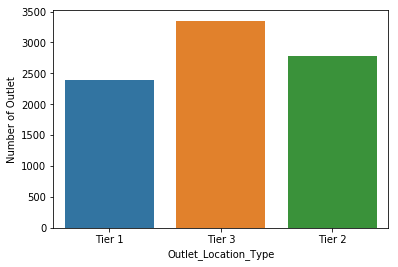

In [9]:
Outlet_per = sns.countplot(Train['Outlet_Location_Type'])
Outlet_per.set(ylabel="Number of Outlet")
plt.show()

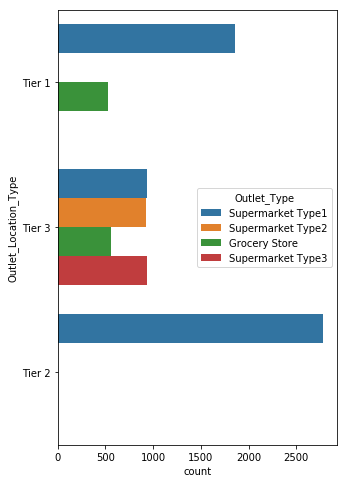

In [19]:
fig, ax = plt.subplots(figsize=(5,8))
figure1=sns.countplot(hue = Train['Outlet_Type'], y=Train['Outlet_Location_Type'], ax=ax)
x=plt.savefig('sing.png')

In [18]:
# The public plotly graphs to include in the email. These can also be generated with `py.plot(figure, filename)`
from IPython.display import display, HTML
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import os
graphs = [
    'https://plot.ly/~christopherp/308',
    'https://plot.ly/~christopherp/306',
    'https://plot.ly/~christopherp/300',
    'https://plot.ly/~christopherp/296'
]

template = (''
    '<a href="{graph_url}" target="_blank">' # Open the interactive graph when you click on the image
        '<img src="{graph_url}.png">'        # Use the ".png" magic url so that the latest, most-up-to-date image is included
    '</a>'
    '{caption}'                              # Optional caption to include below the graph
    '<br>'                                   # Line break
    '<a href="{graph_url}" style="color: rgb(190,190,190); text-decoration: none; font-weight: 200;" target="_blank">'
        'Click to comment and see the interactive graph'  # Direct readers to Plotly for commenting, interactive graph
    '</a>'
    '<br>'
    '<hr>'                                   # horizontal line
'')

email_body = ''
for graph in graphs:
    _ = template
    _ = _.format(graph_url=graph, caption='')
    email_body += _

display(HTML(email_body))

me  = 'sushantinfycs31@gmail.com'
recipient = 'sushantcs31@gmail'
subject = 'Graph Report'

email_server_host = 'smtp.gmail.com'
port = 587
email_username = me
email_password = 'ddddddddddd'

msg = MIMEMultipart('alternative')
msg['From'] = me
msg['To'] = recipient
msg['Subject'] = subject

msg.attach(MIMEText(email_body, 'html'))

server = smtplib.SMTP(email_server_host, port)
server.ehlo()
server.starttls()
server.login(email_username, email_password)
server.sendmail(me, recipient, msg.as_string())
server.close()\

SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials b24sm13406514pfo.84 - gsmtp')

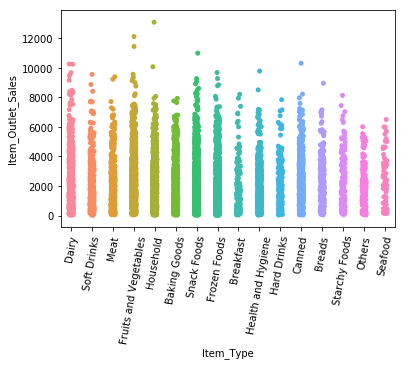

In [18]:
ax = sns.stripplot(x=Train['Item_Type'],y=Train['Item_Outlet_Sales'],data=Train)
plt.xticks(rotation=80)
plt.show()

In [64]:
lr = linear_model.LinearRegression()

In [ ]:
features = ['Item_Weight',]

In [75]:
Train = Train.iloc[:,0:11]

In [76]:
target = Train.iloc[:,10]

In [79]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 732.5+ KB


In [77]:
lr.fit(Train,target)

ValueError: could not convert string to float: 'FDA15'